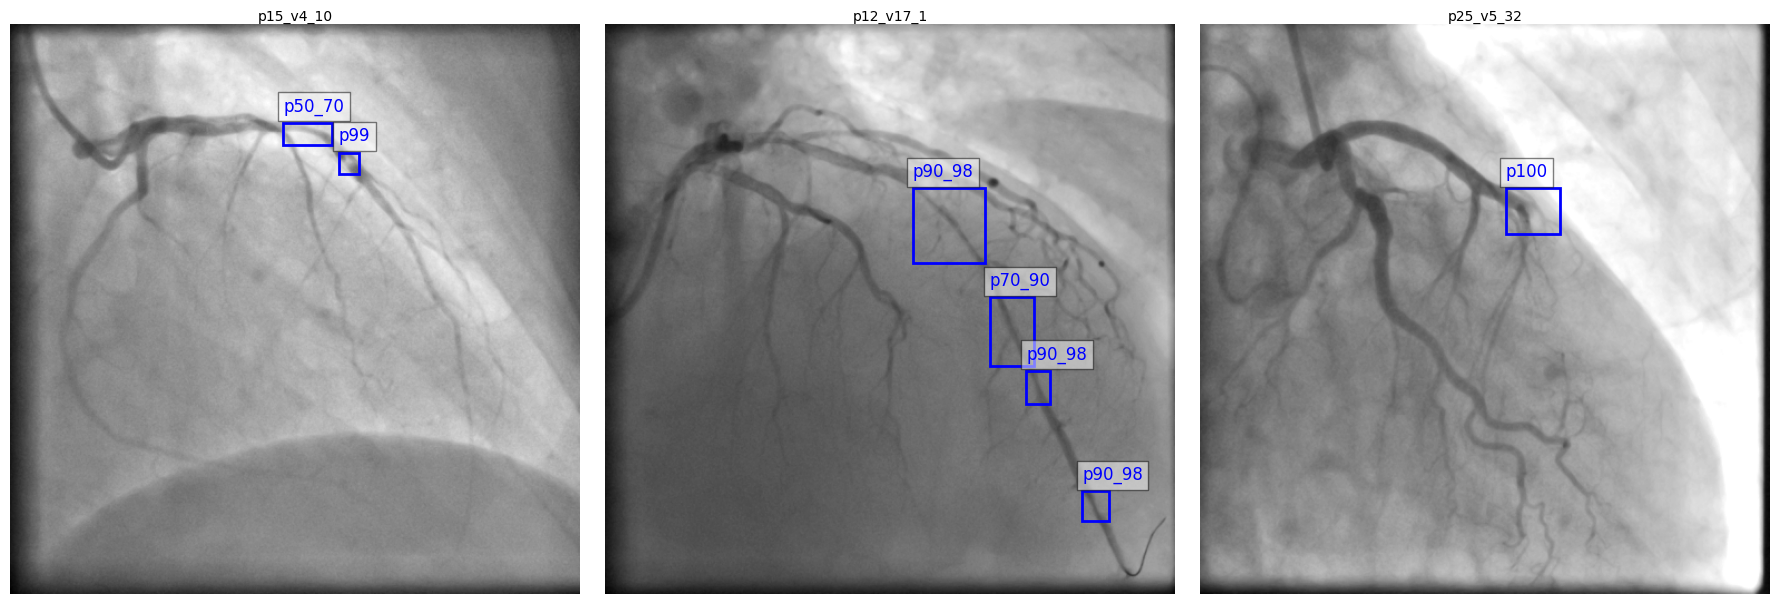

In [14]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

def visualize_bounding_boxes(df, patient_video_frame, ax=None):
    patient, video, frame = patient_video_frame.split("_")
    frame = int(frame)  

    row = df[(df['Patient'] == patient) & (df['Video'] == video) & (df['Frame'] == frame)]
    if row.empty:
        raise ValueError(f"No data found for input: {patient_video_frame}")

    image_path = row.iloc[0]['SelectedFramesLesionVideo']
    bbox_file_path = row.iloc[0]['GroundTruthFile']

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not os.path.exists(bbox_file_path):
        raise FileNotFoundError(f"Ground truth file not found: {bbox_file_path}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

    # Read and parse bounding box file
    with open(bbox_file_path, 'r') as file:
        bbox_data = file.readlines()

    bboxes = []
    for line in bbox_data:
        parts = line.strip().split()
        x, y, w, h = map(int, parts[:4])  # First 4 elements are [x, y, w, h]
        tag = parts[4]  # Last element is the lesion tag
        bboxes.append((x, y, w, h, tag))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    for (x, y, w, h, tag) in bboxes:
        ax.add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none'))
        ax.text(x, y -10, tag, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(f"{patient_video_frame}", fontsize=10, pad=-10)
    return ax

data = pd.read_csv(filepath_or_buffer="/home/mario/Python/Datasets/CADICA_Project/information_dataset.csv")

inputs_1 = ["p1_v11_26", "p23_v1_15", "p23_v10_10"]
inputs = ["p15_v4_10", "p12_v17_1", "p25_v5_32"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, patient_video_frame in enumerate(inputs):
    visualize_bounding_boxes(data, patient_video_frame, ax=axes[i])

plt.tight_layout()
plt.savefig('show_images_2.png')
plt.show()


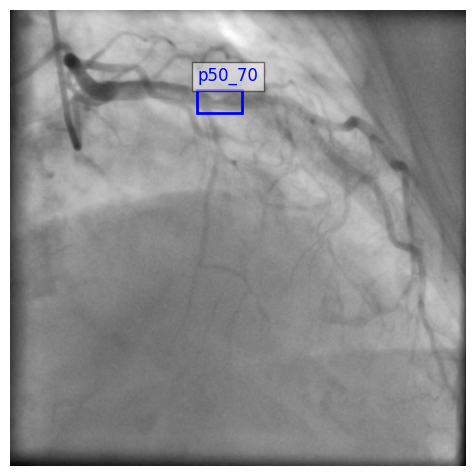

In [50]:
patient_video_frame = "p26_v2_28"

fig, axes = plt.subplots(1, 1, figsize=(5,5))

visualize_bounding_boxes(data, patient_video_frame, ax=axes)

plt.tight_layout()
plt.title("")
plt.savefig(f'/home/mario/Python/Datasets/CADICA_Images/image_cadica_{patient_video_frame}.svg', bbox_inches='tight', pad_inches=0)
plt.show()


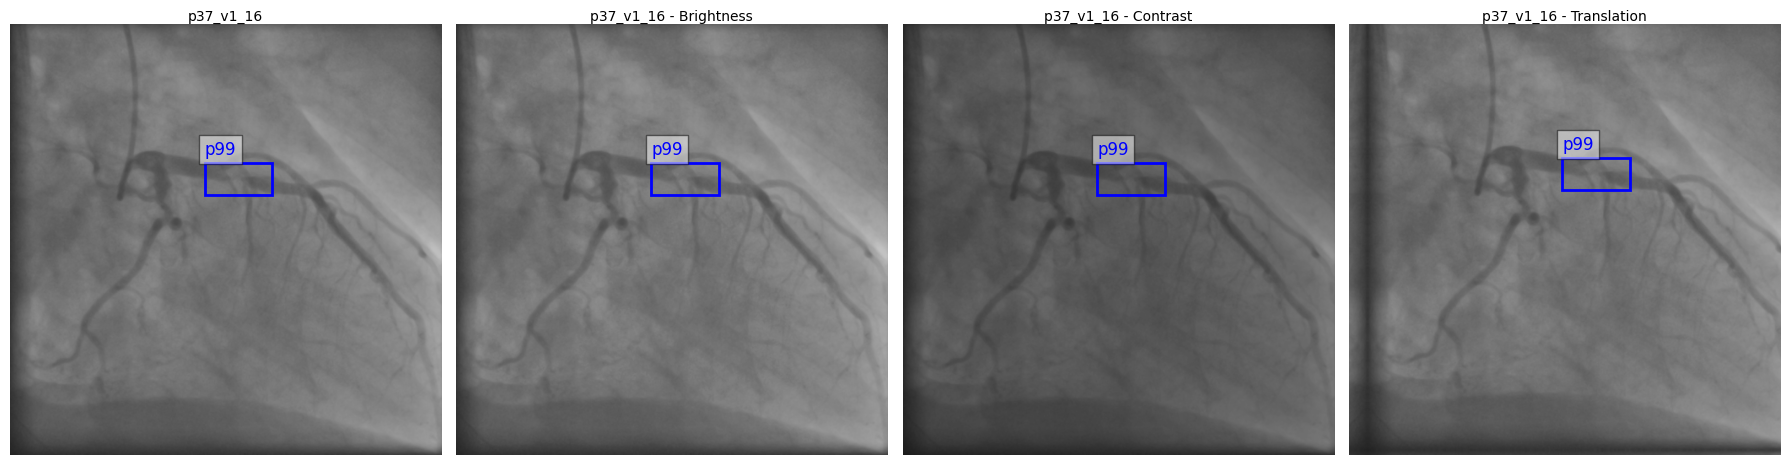

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

def visualize_bounding_boxes_new(df, frame_path, title=None, ax=None):
    """
    Visualize bounding boxes for a given frame using the new CSV structure.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'Frame_path' and 'Groundtruth_path'.
        frame_path (str): Path to the frame image.
        title (str): Custom title for the image.
        ax (plt.Axes): Matplotlib axes for the plot.
        
    Returns:
        plt.Axes: Axes with the bounding boxes drawn.
    """
    # Filter the row based on the frame path
    row = df[df['Frame_path'] == frame_path]
    if row.empty:
        raise ValueError(f"No data found for input: {frame_path}")

    image_path = row.iloc[0]['Frame_path']
    bbox_file_path = row.iloc[0]['Groundtruth_path']

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not os.path.exists(bbox_file_path):
        raise FileNotFoundError(f"Ground truth file not found: {bbox_file_path}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read and parse bounding box file
    with open(bbox_file_path, 'r') as file:
        bbox_data = file.readlines()

    bboxes = []
    for line in bbox_data:
        parts = line.strip().split()
        x, y, w, h = map(int, parts[:4])  # [x, y, w, h]
        tag = parts[4]  # Tag for the bounding box
        bboxes.append((x, y, w, h, tag))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    # Draw bounding boxes
    for (x, y, w, h, tag) in bboxes:
        ax.add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none'))
        ax.text(x, y - 10, tag, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Set the title
    title = title if title else os.path.basename(frame_path)
    ax.set_title(title, fontsize=10, pad=-10)
    return ax

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

data = pd.read_csv(filepath_or_buffer="/home/mario/Python/Datasets/CADICA_Project/information_dataset.csv")
visualize_bounding_boxes(data, "p37_v1_16", ax=axes[0])

# Load the new CSV
data = pd.read_csv("/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/augmented_val.csv")

# Example inputs
inputs = [
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_brightness_2.png",
     "title": "p37_v1_16 - Brightness"},
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_contrast_1.png",
     "title": "p37_v1_16 - Contrast"},
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_translation_2.png",
     "title": "p37_v1_16 - Translation"}
]

for i, input_data in enumerate(inputs):
    frame_path = input_data["frame_path"]
    title = input_data["title"]
    visualize_bounding_boxes_new(data, frame_path, title=title, ax=axes[i+1])

plt.tight_layout()
plt.savefig(f'/home/mario/Python/Datasets/CADICA_Images/augmentation.pdf', bbox_inches='tight', pad_inches=0)
plt.show()



/home/mariopasc/Python/Results/Coronariografias/patient-based/RandomSamplerBaseline/detect/trial_0_training/results.csv
Trial 0 - F1 Scores: [0.03175064 0.17091223 0.10053449 0.06516947 0.07779253 0.10471637
 0.12201374 0.07973266 0.04996726 0.08291257 0.07482529 0.06526346
 0.0728024  0.07921693 0.04817343 0.04894684 0.03820776], Min: 0.031750638390649934, Max: 0.17091222928957048, Mean: 0.1221416000729517
/home/mariopasc/Python/Results/Coronariografias/patient-based/RandomSamplerBaseline/detect/trial_1_training/results.csv
Trial 1 - F1 Scores: [0.10867987 0.083303   0.11679954 0.11982209 0.05037311 0.11146044
 0.11899505 0.13158362 0.09005893 0.10457609 0.10626119 0.07338229
 0.07577628 0.0941791  0.12968855 0.10142886 0.0878302  0.07137912], Min: 0.050373110625527844, Max: 0.1315836150189455, Mean: 0.1221416000729517
/home/mariopasc/Python/Results/Coronariografias/patient-based/RandomSamplerBaseline/detect/trial_2_training/results.csv
Trial 2 - F1 Scores: [0.         0.03349517 0.08

ValueError: 'yerr' must not contain negative values

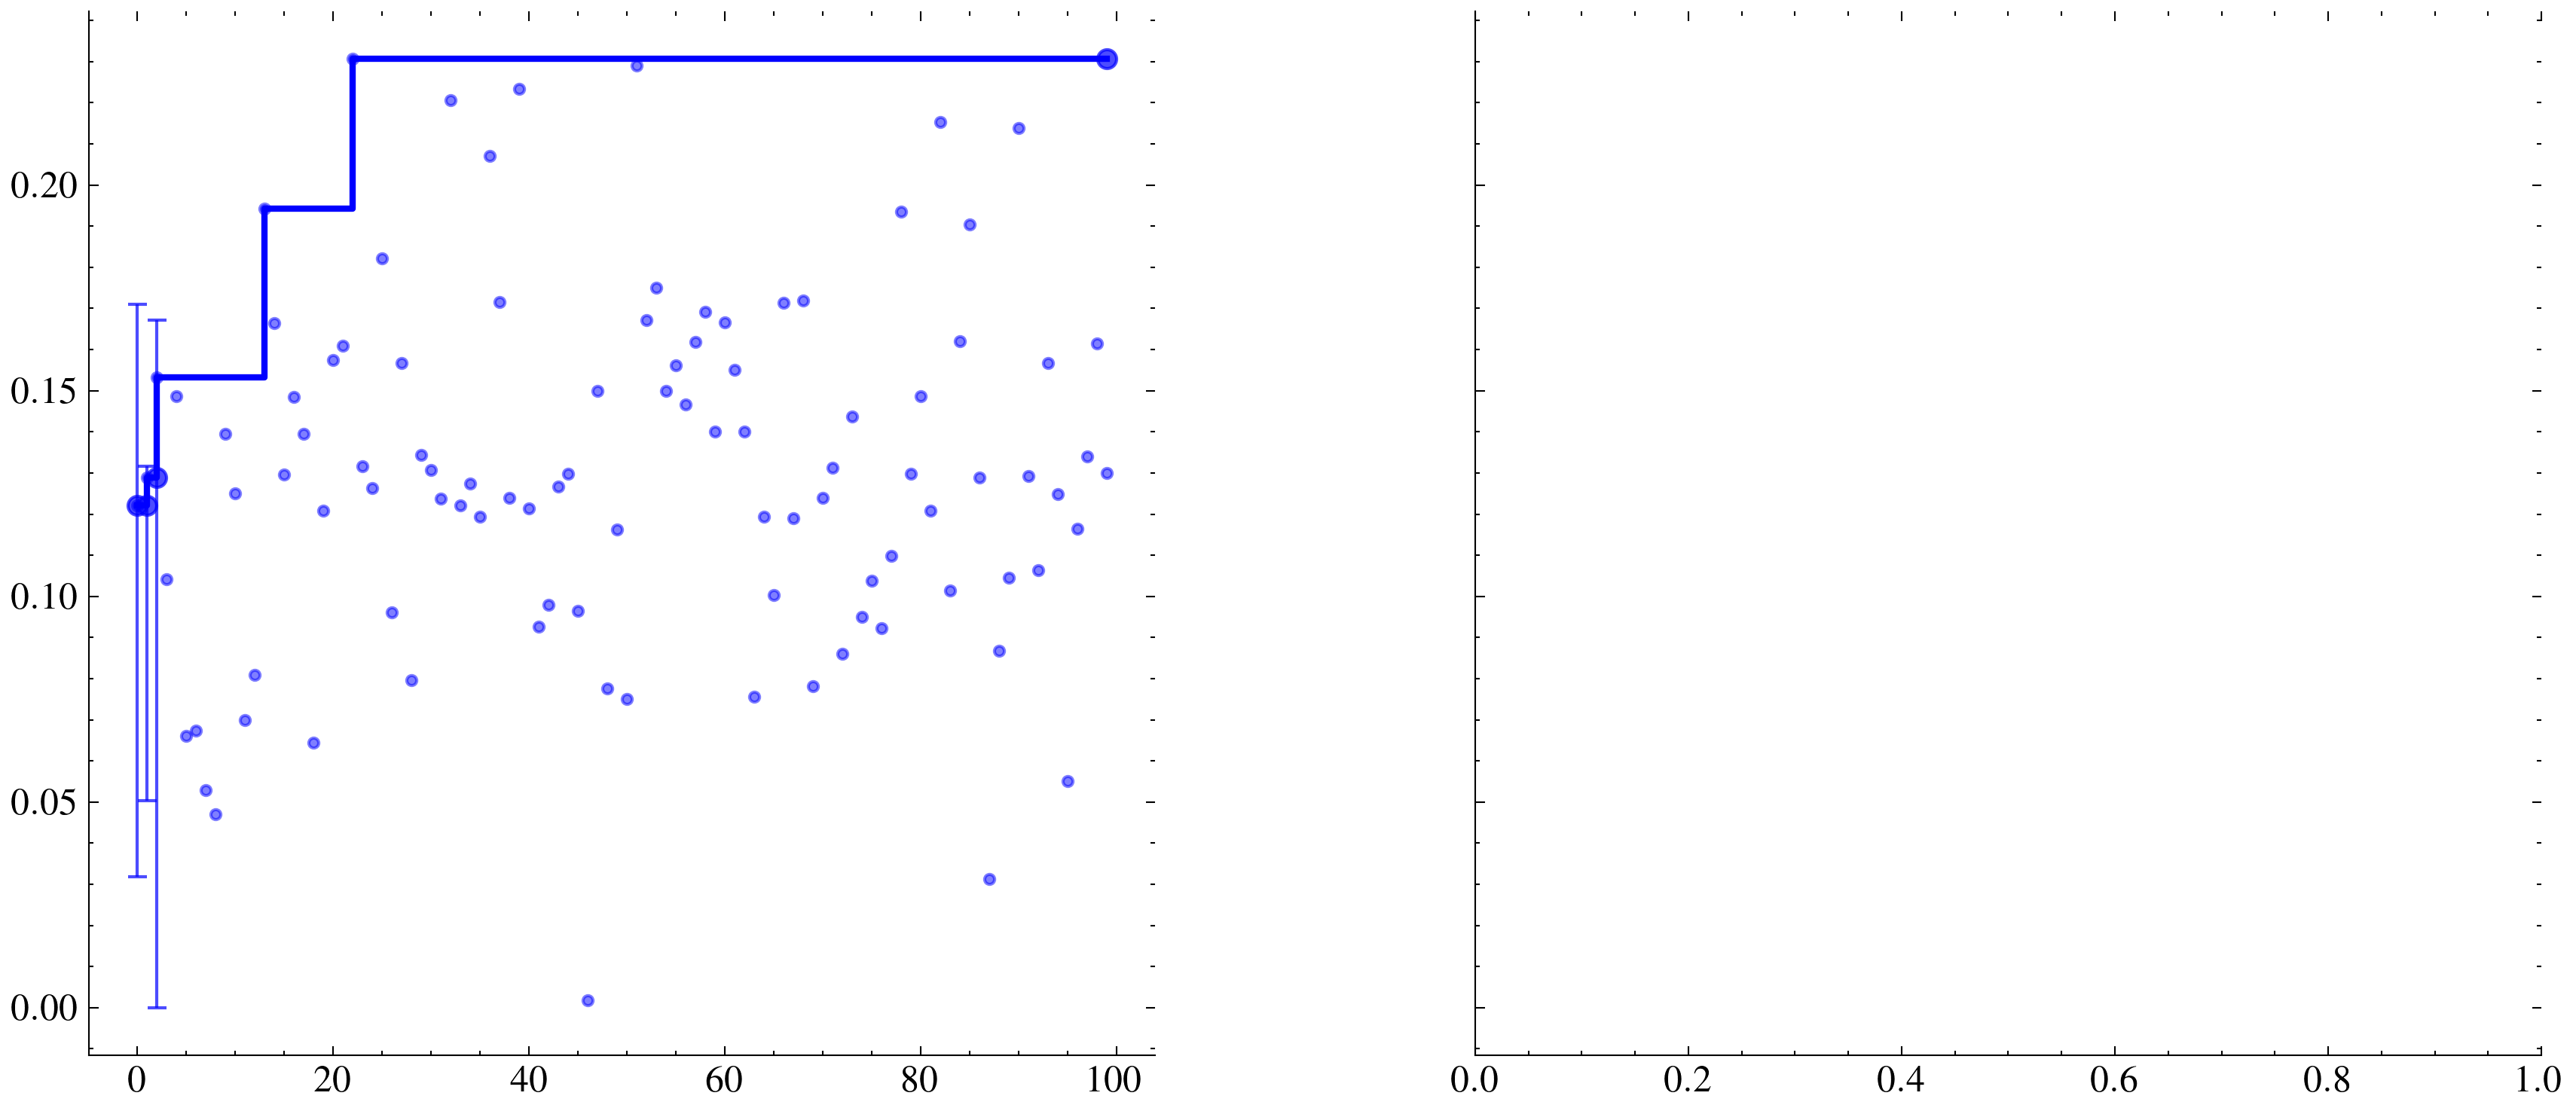

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from typing import Dict, List
import scienceplots
plt.style.use(['science', 'ieee', 'std-colors'])
plt.rcParams['font.size'] = 12
plt.rcParams.update({'figure.dpi': '300'})
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

def plot_hyperparameter_results(
    sampler_csv_paths: Dict[str, Dict[str, str]], 
    output_path: str, 
    output_format: str = "png",
    metric_column: Dict[str, str] = {"F1-Score": "objective_0"}
):
    """
    Generate combined visualizations of a chosen metric per trial for hyperparameter optimization samplers.
    Adds whiskers to optimal trials based on F1-Score per epoch computed from results.csv files.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file.
            - "color": Color to plot for the sampler.
            - "results_root_folder": Path to the root folder containing results for optimal trials.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
        metric_column (Dict[str, str]): Dictionary with display name as key and column name as value to plot on Y-axis.
    """
    # Extract metric name and column
    metric_name, metric_col = list(metric_column.items())[0]

    # Helper function to calculate the optimal front
    def calculate_optimal_front(trials: List[int], scores: List[float]):
        frontier_x, frontier_y = [], []
        best_so_far = -float("inf")
        for trial, score in zip(trials, scores):
            if score > best_so_far:
                if frontier_x:  # Add horizontal line to current trial
                    frontier_x.append(trial)
                    frontier_y.append(best_so_far)
                best_so_far = score
                frontier_x.append(trial)
                frontier_y.append(best_so_far)
        if trials[-1] != frontier_x[-1]:  # Extend horizontally to the last trial
            frontier_x.append(trials[-1])
            frontier_y.append(best_so_far)
        return frontier_x, frontier_y

    # Helper function to calculate F1-Score for a trial
    def compute_f1_score(results_file: str):
        df = pd.read_csv(results_file)
        precision = df["metrics/precision(B)"]
        recall = df["metrics/recall(B)"]
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)
        return f1_score

    # Initialize the plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    legends = []
    total_samplers = len(sampler_csv_paths)

    # Plot each sampler
    for idx, (sampler_name, sampler_data) in enumerate(sampler_csv_paths.items()):
        df = pd.read_csv(sampler_data["path"])
        trials = df.index.values
        scores = df[metric_col]
        
        # Calculate optimal front
        frontier_x, frontier_y = calculate_optimal_front(trials, scores)
        
        # Identify the optimal trials
        optimal_trials = set(frontier_x)
        
        # Subplot A: Random Sampler
        ax = axes[0] if idx == 0 else axes[1]
        ax.scatter(trials, scores, s=10, color=sampler_data["color"], alpha=0.5)
        ax.plot(frontier_x, frontier_y, color=sampler_data["color"], linewidth=2)

        # Add whiskers for optimal trials
        for trial in optimal_trials:
            results_file = os.path.join(sampler_data["results_root_folder"], f"trial_{trial}_training", "results.csv")
            print(results_file)
            if os.path.exists(results_file):
                f1_scores = compute_f1_score(results_file)
                min_f1, max_f1 = f1_scores.min(), f1_scores.max()
                mean_f1 = frontier_y[frontier_x.index(trial)]
                # Ensure non-negative yerr
                lower_err = max(0, mean_f1 - min_f1)
                upper_err = max(0, max_f1 - mean_f1)
                
                print(f"Trial {trial} - F1 Scores: {f1_scores.values}, Min: {min_f1}, Max: {max_f1}, Mean: {mean_f1}")
                print(f"Errors - Lower: {lower_err}, Upper: {upper_err}")
                ax.errorbar(trial, mean_f1,
                            yerr=[[mean_f1 - min_f1], [max_f1 - mean_f1]],
                            fmt="o", color=sampler_data["color"], capsize=3, alpha=0.7)
        
        # Labels and titles
        ax.set_xlabel("Trial")
        if idx == 0:
            ax.set_ylabel(metric_name)
        ax.text(-0.05, 1.10, f"{'a.' if idx == 0 else 'b.'}", transform=ax.transAxes, fontsize=12, fontweight='bold',
                va='top', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
        ax.set_title(f"{sampler_name.upper()} Sampler")
        legends.append((plt.Line2D([], [], color=sampler_data["color"], linewidth=2), sampler_name.upper()))
    
    # Unified legend
    handles, labels = zip(*legends)
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=total_samplers)
    
    # Save and show the figure
    plt.tight_layout()
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches='tight')
    plt.show()


base_path = "/home/mariopasc/Python/Results/Coronariografias/patient-based"
base_name = "hyperparameter_optimization_results.csv"
# Example Usage
sampler_paths = {
    "random": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name),
                "color": "blue", "results_root_folder": os.path.join(base_path, "RandomSamplerBaseline", "detect")},
    "CMAES": {"path": os.path.join(base_path, "CMAES", base_name),
               "color": "red", "results_root_folder": os.path.join(base_path, "CMAES", "detect")}
}
plot_hyperparameter_results(sampler_paths, output_path="hyperparam_results", output_format="png", metric_column={"F1-Score": "user_attrs_f1_score"})


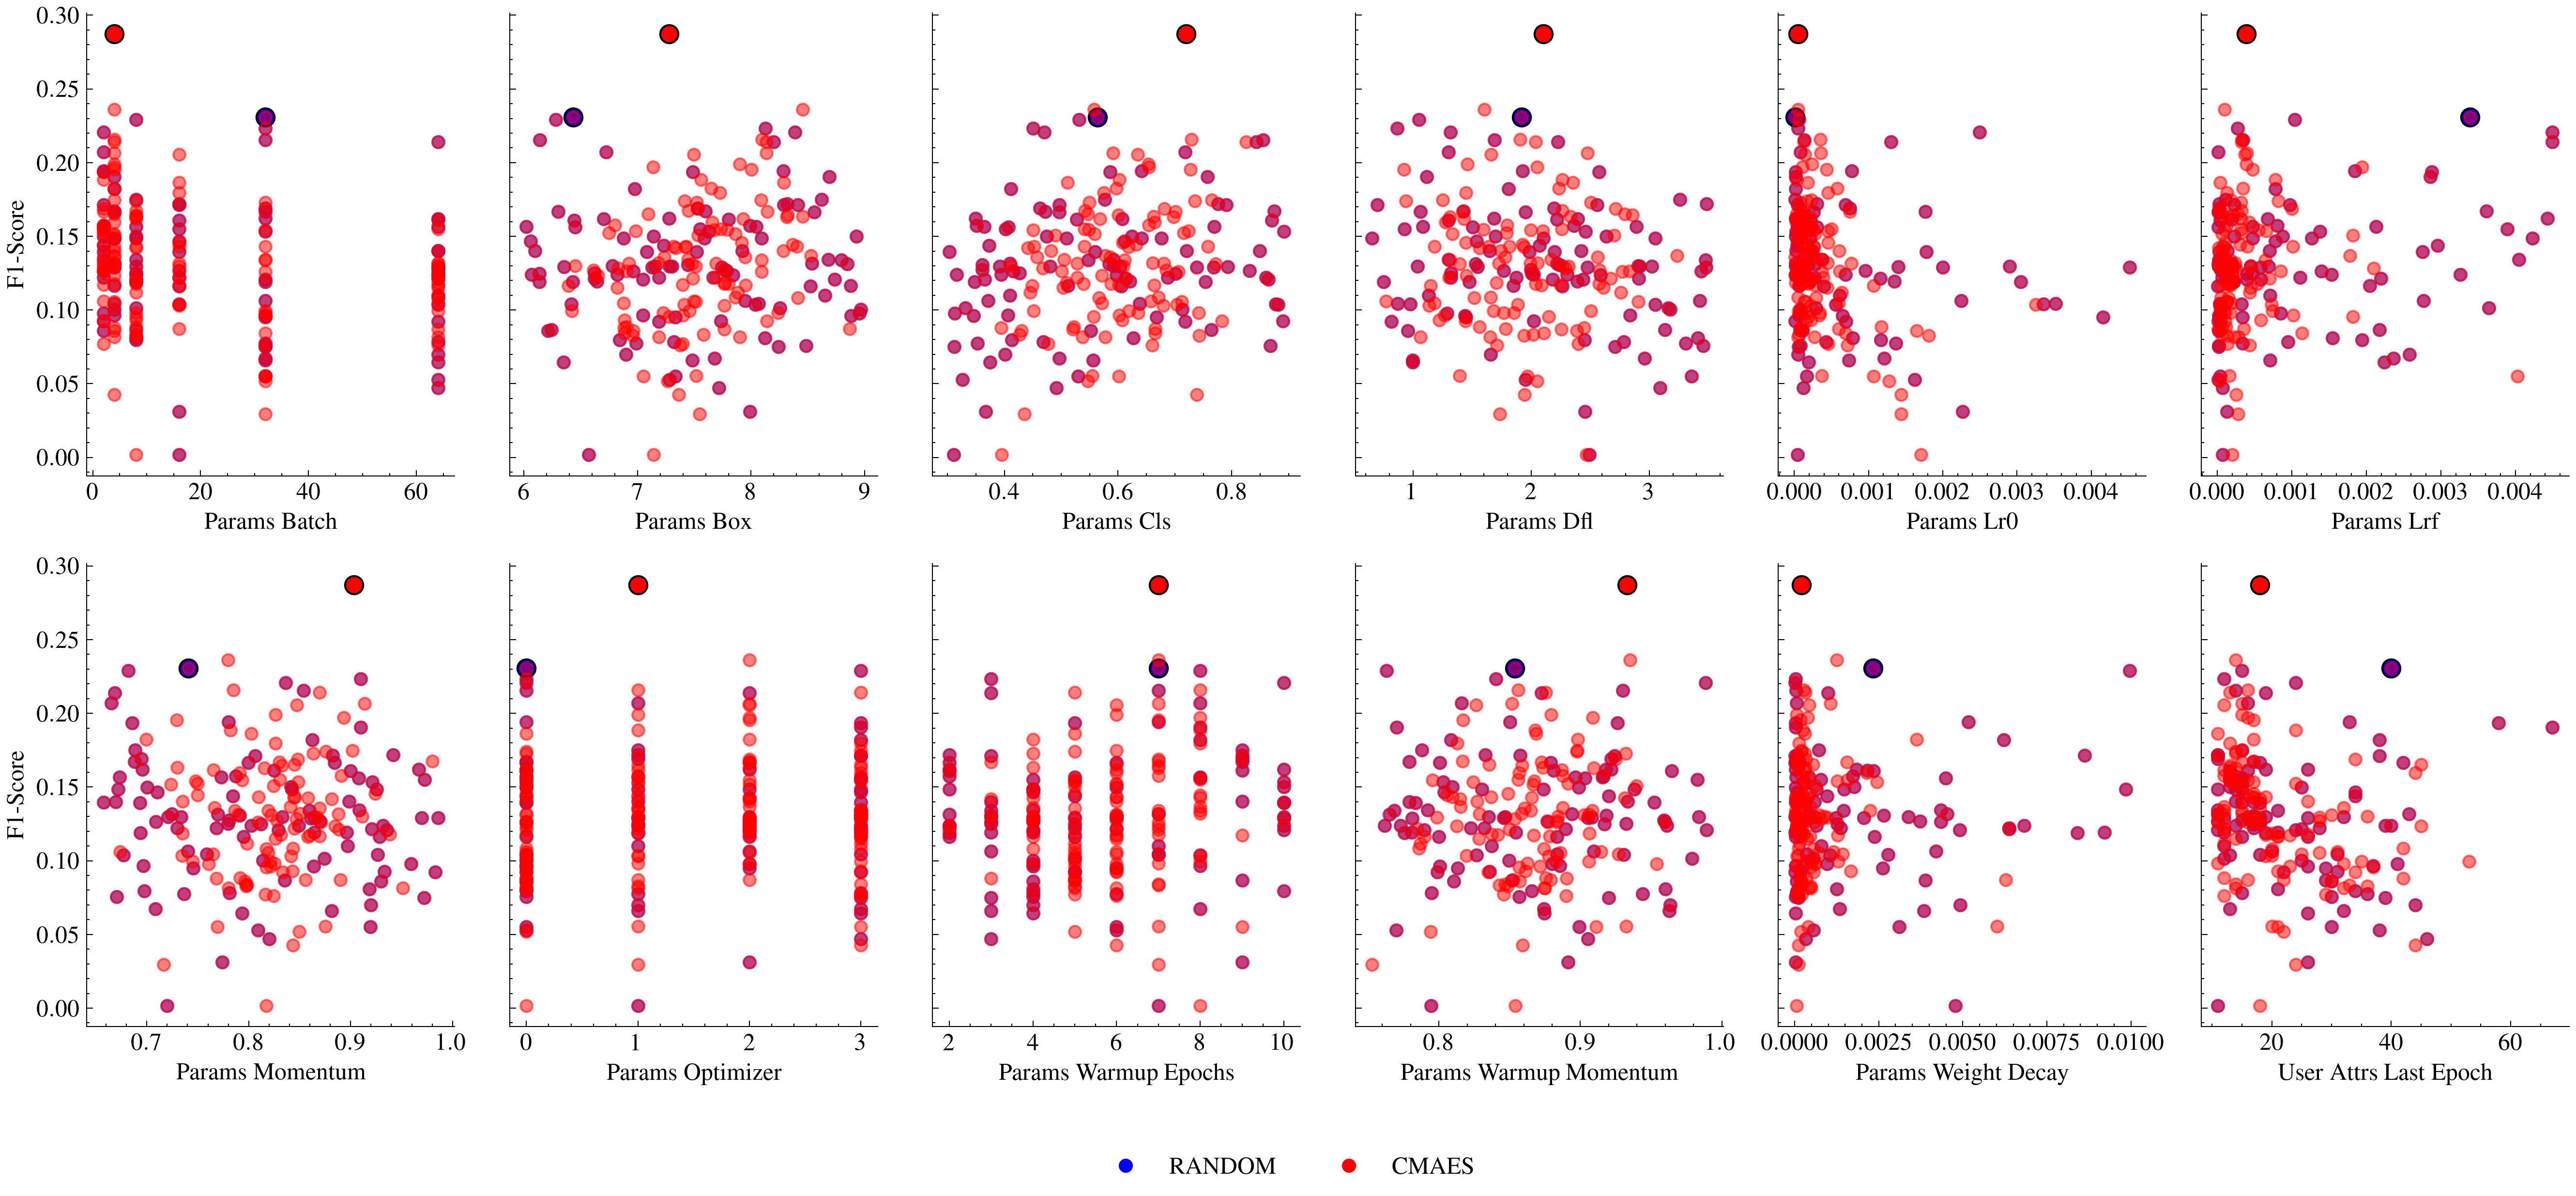

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict
from sklearn.preprocessing import LabelEncoder

def plot_hyperparameter_scatter(
    sampler_csv_paths: Dict[str, Dict[str, str]],
    output_path: str,
    output_format: str = "png",
    metric_column: Dict[str, str] = {"F1-Score": "user_attrs_f1_score"}
):
    """
    Generate scatterplots for hyperparameters with performance metric as Y-axis, highlighting the best hyperparameter values
    for each sampler.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file.
            - "color": Color to plot for the sampler.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
        metric_column (Dict[str, str]): Dictionary with display name as key and column name as value for the metric.
    """
    # Extract metric name and column
    metric_name, metric_col = list(metric_column.items())[0]

    # List of hyperparameters to plot
    hyperparameters = [
        "params_batch", "params_box", "params_cls", "params_dfl", "params_lr0",
        "params_lrf", "params_momentum", "params_optimizer", "params_warmup_epochs",
        "params_warmup_momentum", "params_weight_decay", "user_attrs_last_epoch"
    ]

    # Prepare the figure with 2 rows x 6 columns subplots
    fig, axes = plt.subplots(2, 6, figsize=(18, 8), sharey=True)
    axes = axes.ravel()  # Flatten axes for easy indexing

    # Process each hyperparameter
    for idx, hyperparameter in enumerate(hyperparameters):
        ax = axes[idx]
        
        # Process each sampler and plot data
        for sampler_name, sampler_data in sampler_csv_paths.items():
            # Load data
            df = pd.read_csv(sampler_data["path"])
            if hyperparameter not in df.columns or metric_col not in df.columns:
                continue
            
            # Encode categorical variables (e.g., params_optimizer)
            if hyperparameter == "params_optimizer":
                label_encoder = LabelEncoder()
                df[hyperparameter] = label_encoder.fit_transform(df[hyperparameter].astype(str))
            
            # Identify the best point for the given sampler based on the metric
            best_idx = df[metric_col].idxmax()
            best_value = df.loc[best_idx, hyperparameter]
            best_score = df.loc[best_idx, metric_col]
            
            # Scatter plot with all points and highlight the best
            scatter = ax.scatter(
                df[hyperparameter], df[metric_col], color=sampler_data["color"], alpha=0.5, label=sampler_name if idx == 0 else ""
            )
            ax.scatter(
                best_value, best_score, color=sampler_data["color"], alpha=1.0, edgecolor='black', s=80
            )
            ax.plot([], [], 'o', color=sampler_data["color"], label=sampler_name.upper())  # Dummy plot for legend
        
        # Add titles and labels
        # ax.set_title(hyperparameter.replace("_", " ").title())
        ax.set_xlabel(hyperparameter.replace("_", " ").title())
        if idx % 6 == 0:
            ax.set_ylabel(metric_name)

    for ax in axes:
        ax.spines[['right', 'top']].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    # Unified legend
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate legend entries
    fig.legend(by_label.values(), by_label.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(sampler_csv_paths))

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)

    # Save the figure
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches='tight')
    plt.show()


base_path = "/home/mariopasc/Python/Results/Coronariografias/patient-based"
base_name = "hyperparameter_optimization_results.csv"

# Example Usage
sampler_paths = {
    "random": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "blue"},
    "CMAES": {"path": os.path.join(base_path, "CMAES", base_name), "color": "red"},

}
plot_hyperparameter_scatter(sampler_paths, output_path="hyperparam_scatterplots", output_format="png", metric_column={"F1-Score": "user_attrs_f1_score"})


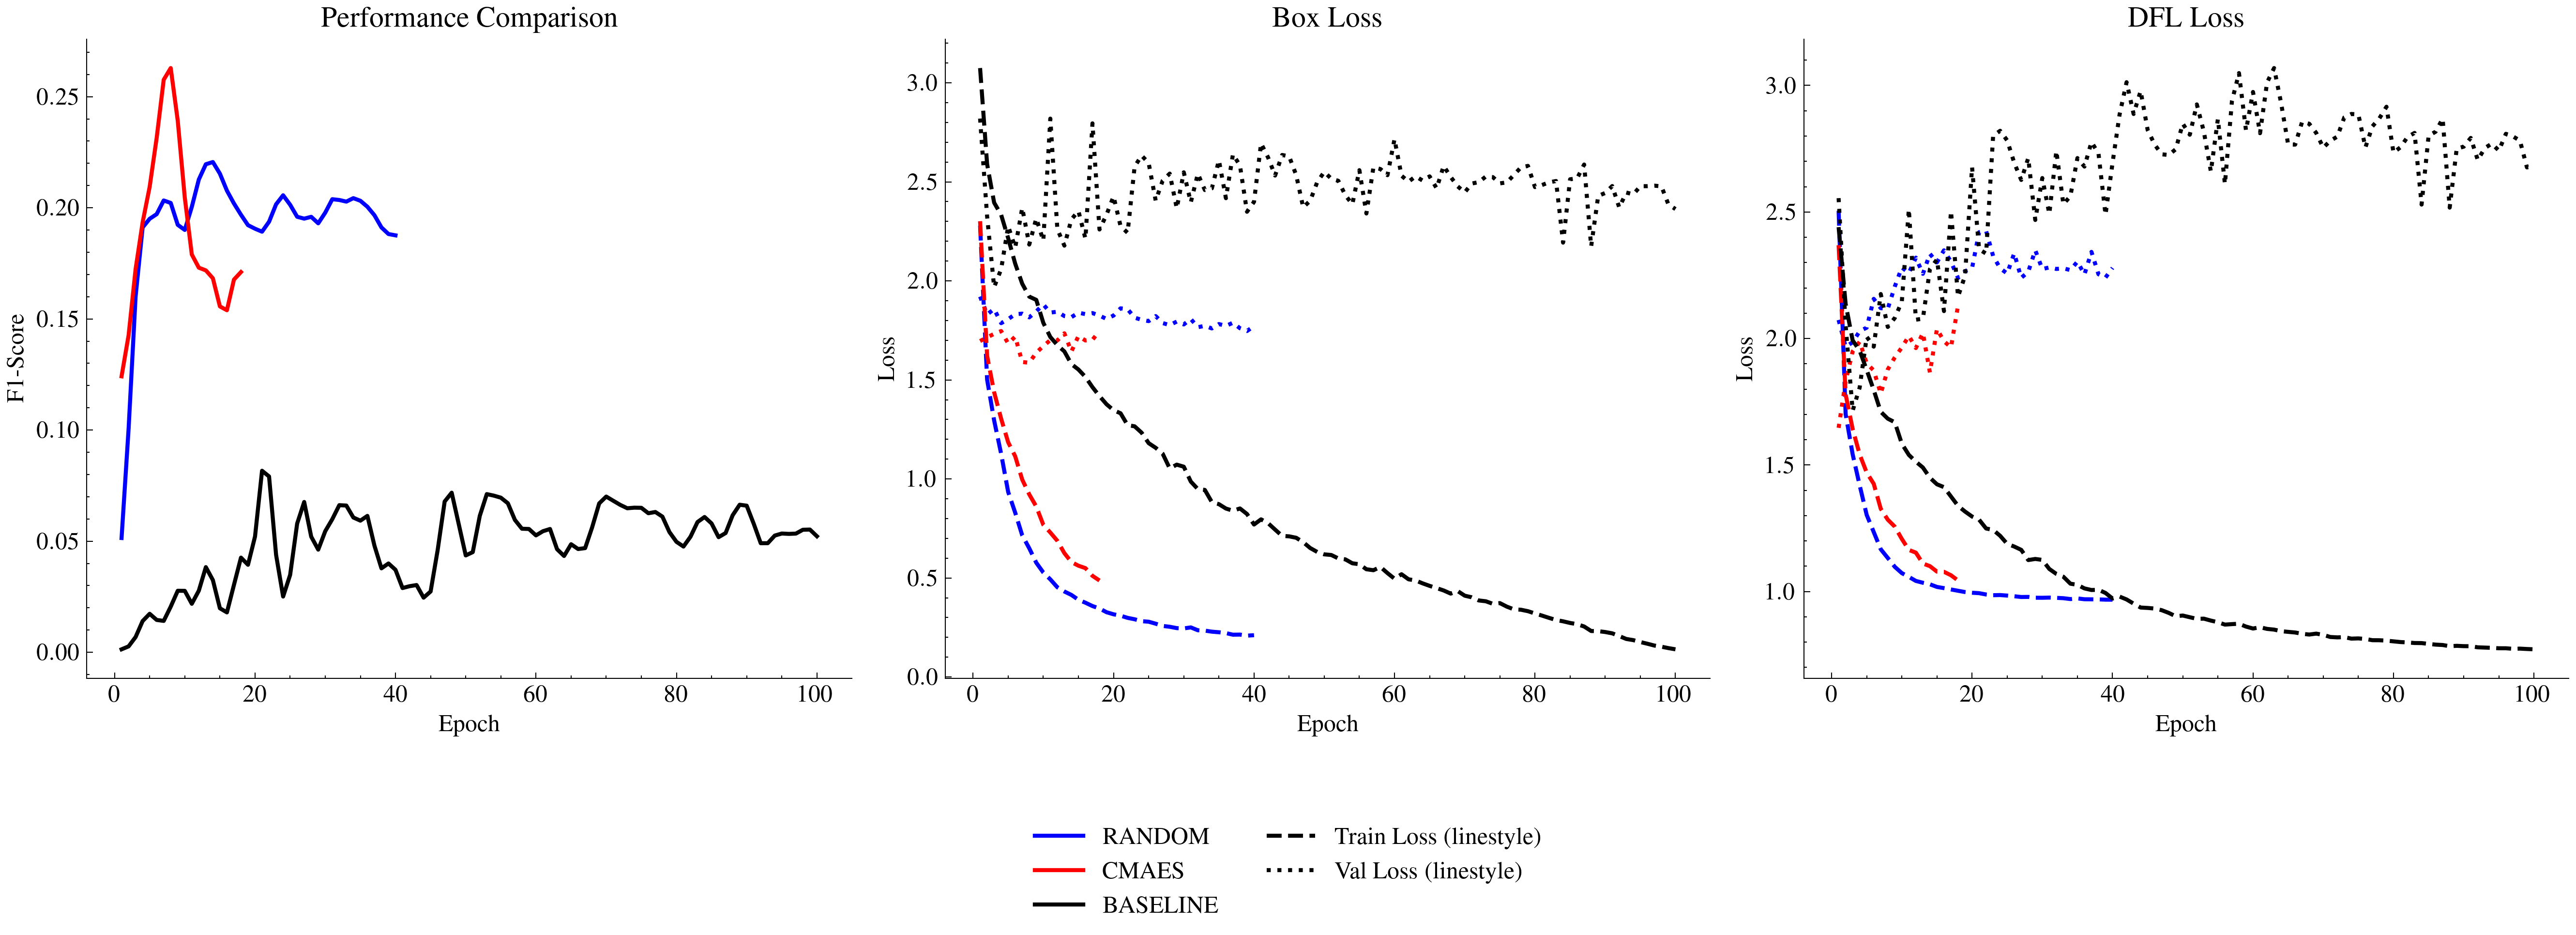

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict
from scipy.ndimage import gaussian_filter1d

def plot_training_comparison(
    sampler_csv_paths: Dict[str, Dict[str, str]],
    output_path: str,
    output_format: str = "png"
):
    """
    Compare the training performance of baseline and optimized YOLO models by computing F1-Score per epoch,
    alongside train/val box loss and dfl loss plots.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file for training results.
            - "color": Color for the data series.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
    """
    # Initialize the figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    f1_ax, box_loss_ax, dfl_loss_ax = axes

    # Plot each sampler's training data, including Baseline
    for sampler_name, sampler_data in sampler_csv_paths.items():
        df = pd.read_csv(sampler_data["path"])
        if "epoch" not in df.columns or "metrics/precision(B)" not in df.columns or "metrics/recall(B)" not in df.columns:
            continue
        
        # Compute F1-Score per epoch
        precision = df["metrics/precision(B)"]
        recall = df["metrics/recall(B)"]
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)
        smoothed_f1 = gaussian_filter1d(f1_score, sigma=1)
        
        # Subplot 1: F1-Score
        f1_ax.plot(df["epoch"], smoothed_f1, color=sampler_data["color"], linewidth=2, label=sampler_name.upper())

        # Subplot 2: train/box_loss vs val/box_loss
        if "train/box_loss" in df.columns and "val/box_loss" in df.columns:
            box_loss_ax.plot(df["epoch"], df["train/box_loss"], color=sampler_data["color"], linestyle="--", linewidth=2, label=f"Train Loss (linestyle)")
            box_loss_ax.plot(df["epoch"], df["val/box_loss"], color=sampler_data["color"], linestyle=":", linewidth=2, label=f"Val Loss (linestyle)")
        
        # Subplot 3: train/dfl_loss vs val/dfl_loss
        if "train/dfl_loss" in df.columns and "val/dfl_loss" in df.columns:
            dfl_loss_ax.plot(df["epoch"], df["train/dfl_loss"], color=sampler_data["color"], linestyle="--", linewidth=2, label=f"Train Loss (linestyle)")
            dfl_loss_ax.plot(df["epoch"], df["val/dfl_loss"], color=sampler_data["color"], linestyle=":", linewidth=2, label=f"Val Loss (linestyle)")

    # Subplot 1: F1-Score formatting
    f1_ax.set_title("Performance Comparison")
    f1_ax.set_xlabel("Epoch")
    f1_ax.set_ylabel("F1-Score")
    
    # Subplot 2: Box Loss formatting
    box_loss_ax.set_title("Box Loss")
    box_loss_ax.set_xlabel("Epoch")
    box_loss_ax.set_ylabel("Loss")
    
    # Subplot 3: DFL Loss formatting
    dfl_loss_ax.set_title("DFL Loss")
    dfl_loss_ax.set_xlabel("Epoch")
    dfl_loss_ax.set_ylabel("Loss")
    
    for ax in axes:
        ax.spines[['right', 'top']].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    # Unified legend (remove duplicates)
    handles, labels = [], []
    for ax in [f1_ax, box_loss_ax, dfl_loss_ax]:
        h, l = ax.get_legend_handles_labels()
        handles += h
        labels += l
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the figure
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches='tight')
    plt.show()


# Example Usage
results_csv_paths = {
    "random": {"path": os.path.join(base_path, "RandomSamplerBaseline", "detect", "trial_22_training", "results.csv"), "color": "blue"},
    "CMAES": {"path": os.path.join(base_path, "CMAES", "detect", "trial_131_training", "results.csv"), "color": "red"},
    "Baseline": {"path": os.path.join(base_path, "Baseline", "results.csv"), "color": "black"},

}
plot_training_comparison(
    sampler_csv_paths=results_csv_paths,
    output_path="training_comparison",
    output_format="png",
)



In [2]:
import pandas as pd
import plotly.express as px
from typing import Dict
from sklearn.preprocessing import LabelEncoder
import os

def plot_parallel_coordinates(
    sampler_csv_paths: Dict[str, Dict[str, str]],
    output_path: str,
    output_format: str = "png",
    metric_column: Dict[str, str] = {"F1-Score": "user_attrs_f1_score"}
):
    """
    Generate an interactive parallel coordinate plot using Plotly to visualize metrics and hyperparameters for hyperparameter optimization samplers.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file.
            - "color": Colormap to plot for the sampler.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
        metric_column (Dict[str, str]): Dictionary with display name as key and column name as value for the metric.
    """
    # Extract metric name and column
    metric_name, metric_col = list(metric_column.items())[0]

    # Define the order of hyperparameter axes
    axes_order = [
        metric_col, "params_batch", "params_box", "params_cls", "params_dfl", "params_lr0",
        "params_lrf", "params_momentum", "params_optimizer", "params_warmup_epochs",
        "params_warmup_momentum", "params_weight_decay", "user_attrs_last_epoch"
    ]

    # Process each sampler
    for sampler_name, sampler_data in sampler_csv_paths.items():
        # Load data
        df = pd.read_csv(sampler_data["path"])
        
        # Filter only the required columns
        df = df[axes_order].dropna()

        # Encode categorical variables (e.g., params_optimizer)
        if "params_optimizer" in df.columns:
            label_encoder = LabelEncoder()
            df["params_optimizer"] = label_encoder.fit_transform(df["params_optimizer"].astype(str))

        # Generate the parallel coordinates plot
        fig = px.parallel_coordinates(
            df, 
            color=metric_col,
            dimensions=axes_order,
            labels={col: col.replace("_", " ").title() for col in axes_order},
            color_continuous_scale=sampler_data["color"]
        )
        
        # Save the figure
        fig.write_image(f"{output_path}_{sampler_name}.{output_format}")
        fig.show()

# Example Usage
sampler_paths = {
    "random": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "Blues"},
    "tpe": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "Reds"},
    "cmaes": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "Greens"}
}
plot_parallel_coordinates(sampler_paths, output_path="parallel_coordinates", output_format="png", metric_column={"F1-Score": "user_attrs_f1_score"})
